In [4]:
from multipoles import MultipoleExpansion
import numpy as np

## Definition der Ladungsdichte
Beispiel: Zwei Punktladungen mit Ladung $\pm q$ auf der z-Achse bei $z = \pm 1$ 

In [5]:
charge_dist = {
    'discrete': True,     # Einzelne Punktladungen
    'charges': [
        {'q': 1, 'xyz': (0, 0, 1)},
        {'q': -1, 'xyz': (0, 0, -1)},
    ]
}

In [8]:
Phi = MultipoleExpansion(charge_dist, 2)

# Koordinatenursprung auf [0, 0, 0] setzen
Phi.center_of_charge = np.array([0, 0, 0])

# Multipolmoment auswählen
l = 1
m = 0

# Normierung berücksichtigen
q = np.sqrt((2*l + 1)/(4*np.pi)) * Phi._calc_multipole_coef(l,m)

print('q_%i%i = %1.4f'%(l,m,q))

q_10 = 0.9772


### Äquipotentiallinien in der x-z Ebene

In [10]:
import matplotlib.pyplot as plt

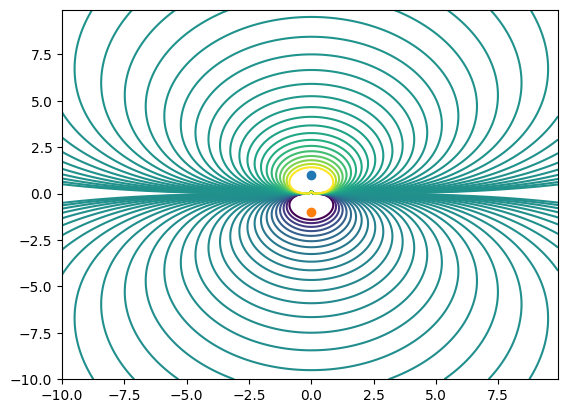

In [11]:
Phi.multipole_moments = Phi._calc_multipole_moments()

ylist = np.arange(-10,10,0.1)
zlist = np.arange(-10,10,0.1)
yv, zv = np.meshgrid(ylist, zlist)

contours = np.concatenate((-np.logspace(0,-3,num=30),np.logspace(-3,0,num=30)))

plt.contour(yv, zv, [[Phi(0, y, z) for y in ylist] for z in zlist] , contours)

for charge in charge_dist['charges']:
    x,y,z = charge['xyz']
    plt.scatter([y],[z])